In [39]:
import matplotlib.pyplot as plt
import numpy as np

def plot_accuracy_from_logs(log_file_paths):
    """
    This function reads multiple log files, extracts the test accuracy for each epoch from each file,
    and plots them on the same graph. It labels each graph line with relevant information and includes
    the algorithm name, learning rate, number of clients, partition information, and dataset in the title.

    :param log_file_paths: List of paths to the log files.
    """
    plt.figure(figsize=(10, 6))
    
    for log_file_path in log_file_paths:
        acc = []
        alg = None
        lr = None
        n_parties = None
        partition = 'unknown'  # Initialize with a default value
        alpha = None
        dataset = None

        with open(log_file_path, 'r') as f:
            for line in f:
                # Extract information from each line
                if '"alg":' in line:
                    alg = line.split(':')[-1].strip().strip('",')
                if '"lr":' in line:
                    lr = line.split(':')[-1].strip().strip(',')
                if '"n_parties":' in line:
                    n_parties = line.split(':')[-1].strip().strip(',')
                if '"partition":' in line:
                    partition = line.split(':')[-1].strip().strip('",')
                if '"alpha":' in line:
                    alpha = line.split(':')[-1].strip().strip(',')
                if '"dataset":' in line:
                    dataset = line.split(':')[-1].strip().strip('",')
                if ">> Global Model Test accuracy" in line:
                    acc.append(float(line.split()[-1]))

        if alg is None or lr is None or n_parties is None or partition == 'unknown' or dataset is None:
            raise ValueError("Required information not found in log file.")

        acc = np.array(acc)
        x_axis = np.arange(len(acc))

        # Creating a label for the legend
        legend_label = f'{alg}, lr={lr}, clients={n_parties}, partition={partition}'
        if partition == 'noniid' and alpha is not None:
            legend_label += f', alpha={alpha}'
        
        plt.plot(x_axis, acc, label=legend_label, linewidth=2)

    plt.xlabel('Communication Rounds', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title(f'Accuracy on {partition} over epochs for {dataset}', fontsize=14)
    plt.legend(loc='lower center', bbox_to_anchor=(1, 1), fontsize=10)
    plt.show()


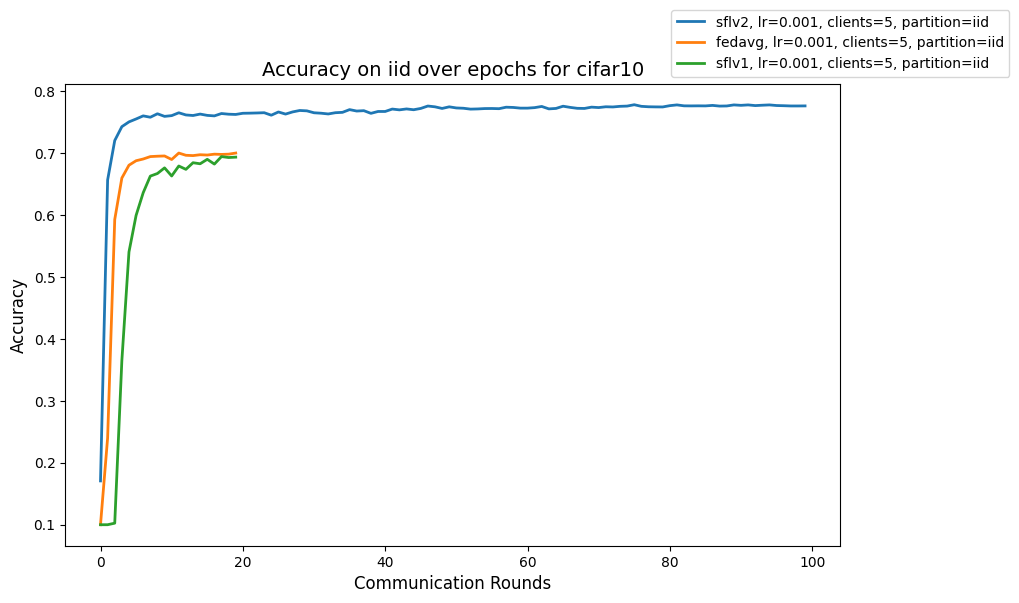

In [64]:
log_files = ['experiment_log-alg=sflv2_partition=iid_lr=0.001_epochs=10_num_users=5_beta=0.01_batch_size=128_opt=adam_dataset=cifar10_2024-02-05-1804-03.log', 'experiment_log-alg=fedavg_partition=iid_lr=0.001_epochs=10_num_users=5_beta=0.01_batch_size=128_opt=adam_dataset=cifar10_2024-01-23-1946-15.log', 'experiment_log-alg=sflv1_partition=iid_lr=0.001_epochs=10_num_users=5_beta=0.01_batch_size=128_opt=adam_dataset=cifar10_2024-01-23-1930-47.log']

plot_accuracy_from_logs(log_files)

In [41]:
log_files1 = ['experiment_log-alg=fedavg_partition=noniid_lr=0.001_epochs=10_num_users=5_beta=0.01_batch_size=128_opt=adam_dataset=cifar10_2024-01-23-2334-39.log', 'experiment_log-alg=sflv1_partition=noniid_lr=0.001_epochs=10_num_users=5_beta=0.01_batch_size=128_opt=adam_dataset=cifar10_2024-01-23-2300-51.log']
log_files2 = ['experiment_log-alg=fedavg_partition=noniid_lr=0.001_epochs=10_num_users=5_beta=0.1_batch_size=128_opt=adam_dataset=cifar10_2024-01-24-0042-02.log', 'experiment_log-alg=sflv1_partition=noniid_lr=0.001_epochs=10_num_users=5_beta=0.1_batch_size=128_opt=adam_dataset=cifar10_2024-01-24-0008-40.log']
log_files3 = ['experiment_log-alg=fedavg_partition=noniid_lr=0.001_epochs=10_num_users=5_beta=0.5_batch_size=128_opt=adam_dataset=cifar10_2024-01-24-0149-13.log', 'experiment_log-alg=sflv1_partition=noniid_lr=0.001_epochs=10_num_users=5_beta=0.5_batch_size=128_opt=adam_dataset=cifar10_2024-01-24-0115-47.log',]
log_files4 = ['experiment_log-alg=fedavg_partition=noniid_lr=0.001_epochs=10_num_users=5_beta=1.0_batch_size=128_opt=adam_dataset=cifar10_2024-01-24-0256-29.log', 'experiment_log-alg=sflv1_partition=noniid_lr=0.001_epochs=10_num_users=5_beta=1.0_batch_size=128_opt=adam_dataset=cifar10_2024-01-24-0223-01.log',]

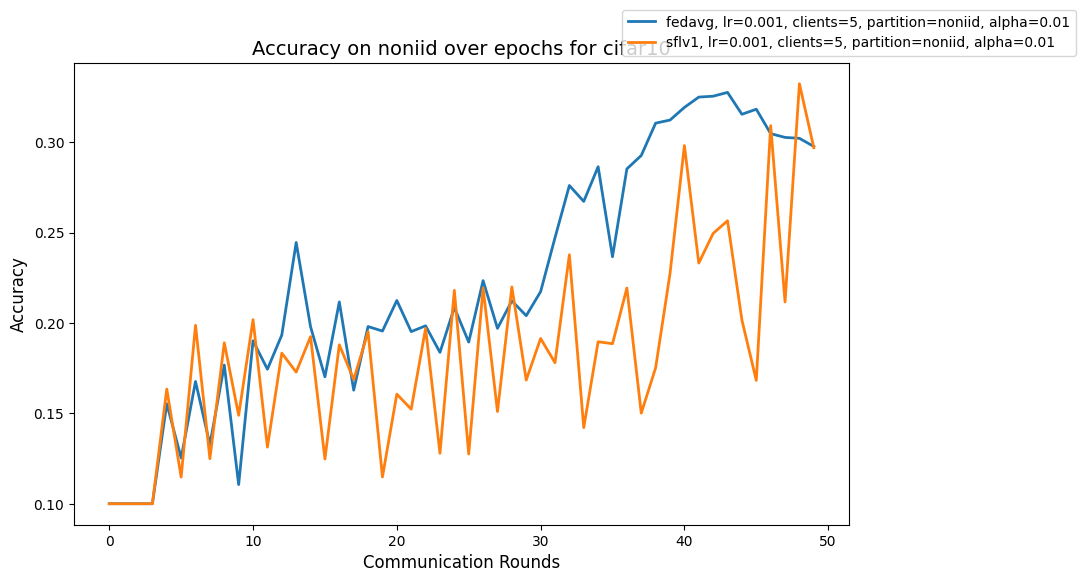

In [42]:
plot_accuracy_from_logs(log_files1)

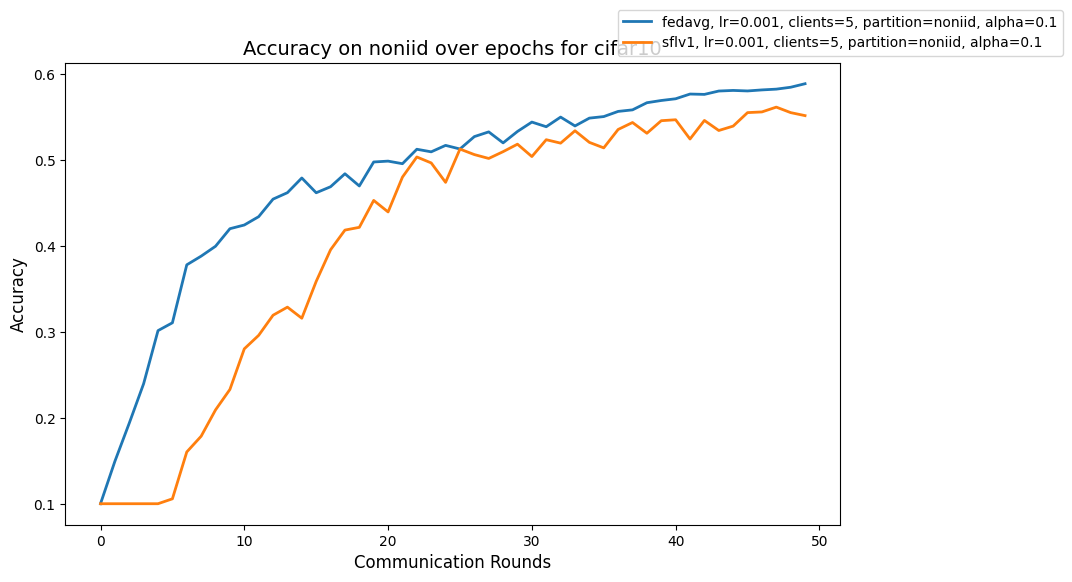

In [43]:
plot_accuracy_from_logs(log_files2)

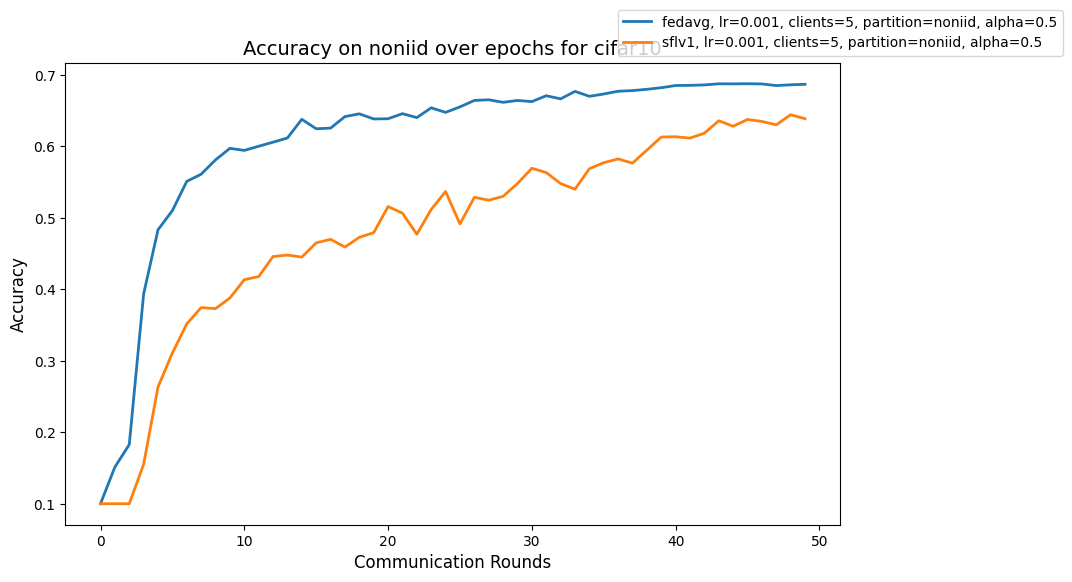

In [44]:
plot_accuracy_from_logs(log_files3)

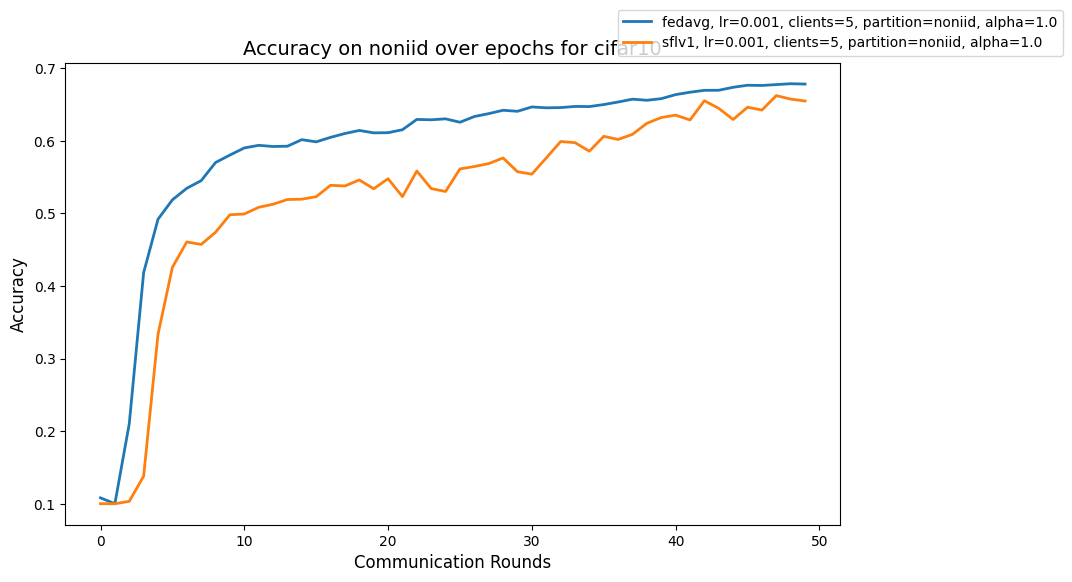

In [45]:
plot_accuracy_from_logs(log_files4)

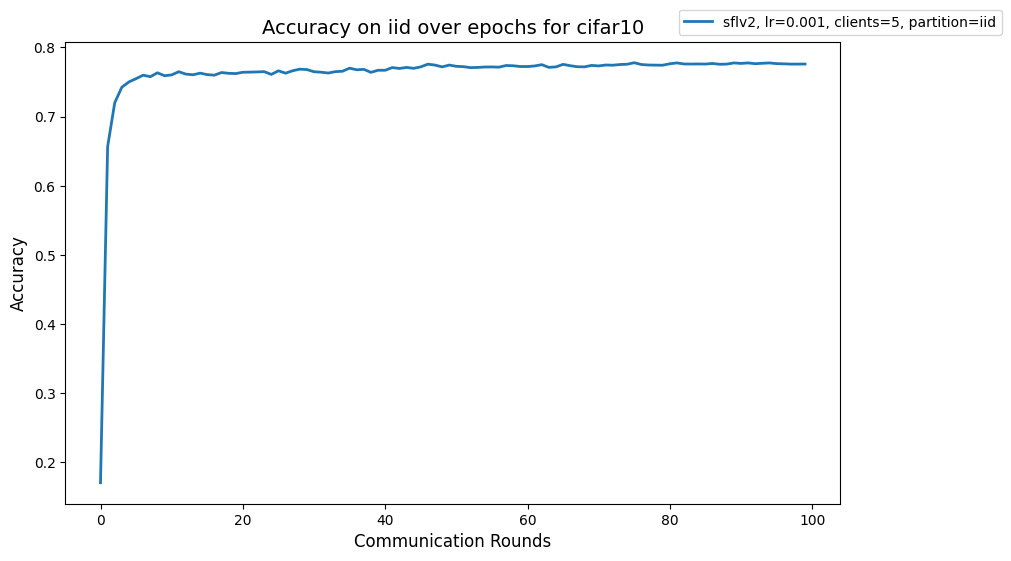

In [63]:
log_files5 = ['experiment_log-alg=sflv1_partition=noniid_lr=0.001_epochs=10_num_users=5_beta=0.1_batch_size=128_opt=adam_dataset=cifar10_2024-01-31-0314-46.log', 'experiment_log-alg=fedavg_partition=noniid_lr=0.001_epochs=10_num_users=5_beta=0.1_batch_size=128_opt=adam_dataset=cifar10_2024-01-30-1557-10.log']
log_files6 = ['experiment_log-alg=sflv1_partition=noniid_lr=0.001_epochs=10_num_users=5_beta=1.0_batch_size=128_opt=adam_dataset=cifar10_2024-01-31-0209-43.log', 'experiment_log-alg=fedavg_partition=noniid_lr=0.001_epochs=10_num_users=5_beta=1.0_batch_size=128_opt=adam_dataset=cifar10_2024-01-30-1702-35.log']
# plot_accuracy_from_logs(log_files6)
